# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [42]:
from cv2 import Canny
from commonfunctions import rgb2gray
import numpy as np 
from scipy.ndimage import generic_filter
import skimage as sk
import matplotlib as plt
from skimage import io

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

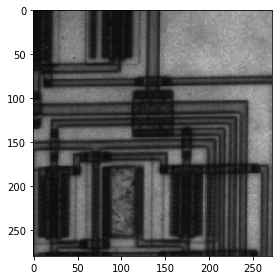

                              horizontal sobel


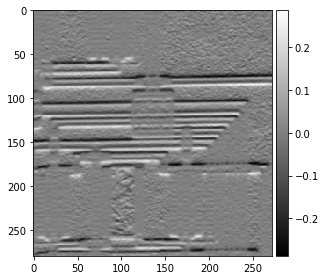

                              vertical sobel


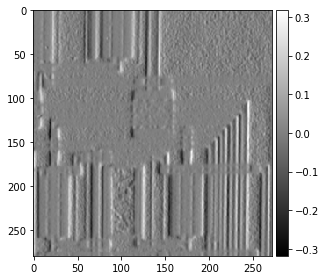

                               sobel


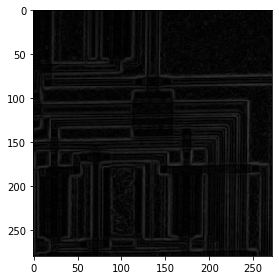

In [44]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

# reading the image. 
img = io.imread('circuit.tif')
io.imshow(img)
io.show()

# applying sobel filter

sobelHorizontalEdges = sk.filters.sobel_h(img)

# fala7 bs 3auz angz
print('                              horizontal sobel')
io.imshow(sobelHorizontalEdges, cmap = plt.cm.gray)
io.show()

print('                              vertical sobel')
sobelVerticalEdges = sk.filters.sobel_v(img)
io.imshow(sobelVerticalEdges, cmap = plt.cm.gray)
io.show()

print('                               sobel')
sobelEdges = sk.filters.sobel(img)
io.imshow(sobelEdges, cmap = plt.cm.gray)
io.show()

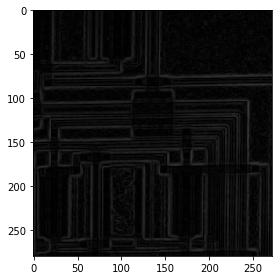

In [45]:
# applying prewitt 
perwittEdges = sk.filters.prewitt(img)
io.imshow(perwittEdges)
io.show()

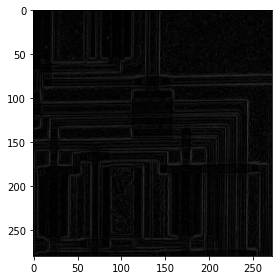

In [46]:
# applying roberts 
robertEdges = sk.filters.roberts(img)
io.imshow(robertEdges, cmap= plt.cm.gray)
io.show()

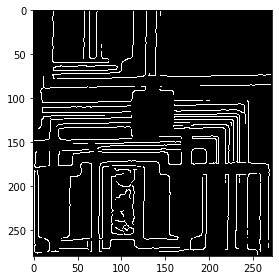

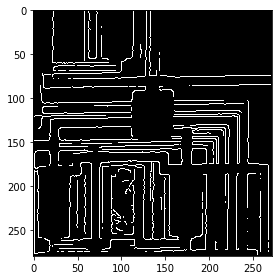

In [68]:
# applying canny with different thresholds 
cannyEdges = sk.feature.canny(img, low_threshold=10, high_threshold=80, sigma=1.4)
io.imshow(cannyEdges)
io.show()

cannyEdges =sk.feature.canny(img, low_threshold=70, high_threshold=100, sigma=0.7)
io.imshow(cannyEdges)
io.show()

# as we increase the thresholds as the details are not detected, 
# this happens because the values which are below the lower threshold 
# are considered not an edge and the values which are above the higher threshold 
# are considered strong edge, but since here we set very high threshold there will be very low 
# or maybe no strong edge, and the values in between are detected depending on the values in between
# as if the pixel is set between two edges then it can be considered a new edge else 
# it is considered not an edge.


(280, 272)
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


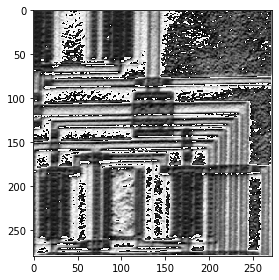

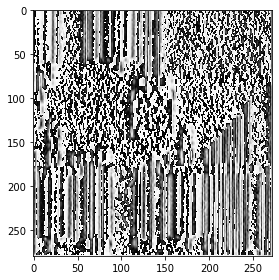

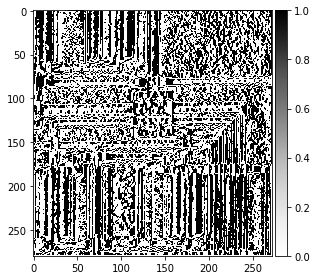

In [48]:
# creating custom sobel 
# applying the logic manually ...
#1- creating our filters 
hy = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]

hx = [[-1, -2, -1],
      [0, 0, 0],
      [-1, 2, 1]]

img = io.imread('circuit.tif')

# creating 2 images one for x and one for y
imgx= img.copy()
imgy= img.copy()


# getting the number of rows and columns 
rows = img.shape[0]
cols = img.shape[1]

 
# 2- for each 3*3 window multiply the two filters and store the result in the central pixel
for r in range (rows - 2):
      for c in range (cols - 2):
            # each 3 * 3 window should be multiplyied by the filter
            # applying convolution
            g = img[r : r+3, c : c+3] * hy
            g2 = (img[r : r+3,c : c+3] * hx)
            cnt1 = 0
            cnt2 = 0
            for i in range(len(g2)):
                  for j in range (len (g2)):
                        cnt1 += g[i][j]
                        cnt2 += g2[i][j]
            # putting the result in the center pixel
            imgy[r + 1][c + 1] = cnt1
            imgx[r + 1][c + 1] = cnt2
final_image = None
final_image = img.copy()
for r in range (rows):
      for c in range (cols ):
            final_image[r][c] = np.sqrt(pow(imgx[r][c], 2) + pow(imgy[r][c], 2))

print(final_image.shape)

# applying the thresholding 
for r in range (rows):
      for c in range (cols):
            if(final_image[r][c] > 150):
                  final_image[r][c] = 1 # above this threshold should be visible 
            else:
                  final_image[r][c] = 0 # and the other should disapper

print(final_image)
io.imshow(imgx, cmap = plt.cm.Greys)
io.show()
io.imshow(imgy, cmap = plt.cm.Greys)
io.show()
io.imshow(final_image, cmap = plt.cm.Greys)
io.show()


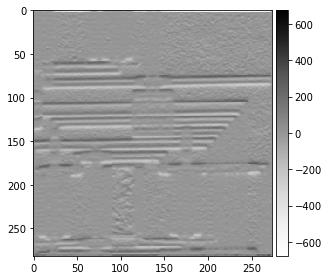

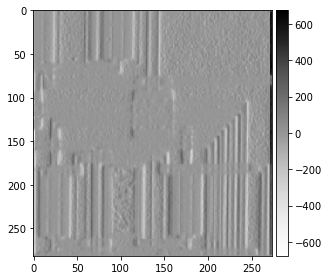

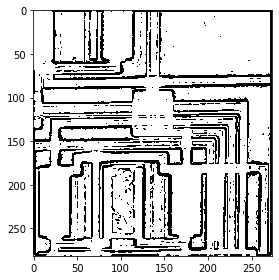

In [56]:
from scipy.signal import convolve2d
# 2- custom sobel applying the logic using functions 
hx = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
hy = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

# applying convolution 
imgx = convolve2d(img , hx)
imgy = convolve2d(img , hy)

# creating new image and filling it with the final values 
final_image = np.sqrt(np.square(imgx) + np.square(imgy))

#applying the threshold on the image 
thresholdedImage = final_image > 100

# printing the vertical, horizontal and the final image
io.imshow(imgx, cmap = plt.cm.Greys)
io.show()
io.imshow(imgy, cmap = plt.cm.Greys)
io.show()
io.imshow(thresholdedImage, cmap = plt.cm.Greys)
io.show()

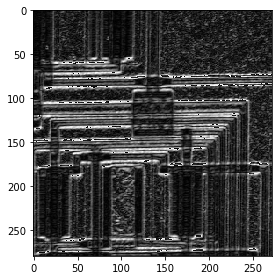

In [50]:
#this is another way to apply sobel using the genaric function. 
# Apply the Sobel operator
def sobel_filter(targetImage):
    return (np.abs((targetImage[0] + 2 * targetImage[1] + targetImage[2]) - (targetImage[6] + 2 * targetImage[7] + targetImage[8])) + # here we use the horizontal.
            np.abs((targetImage[2] + 2 * targetImage[6] + targetImage[7]) - (targetImage[0] + 2 * targetImage[3] + targetImage[6]))) # here we use the vertical. 

# here we apply on the "img" the "filter" with "window size"            
G = generic_filter(img, sobel_filter, (3, 3))
io.imshow(G)
io.show()


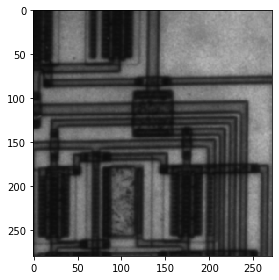

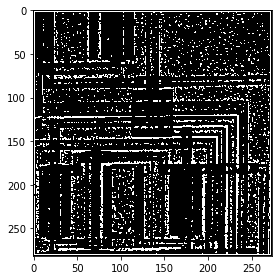

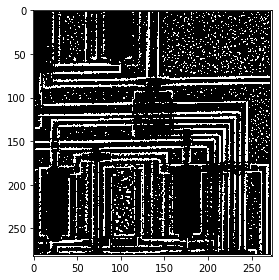

In [61]:
# 3. Custom LoG
thres=0.1 # as we increase this value we can get better values using f1 but worst values using f2
img = io.imread(
    'circuit.tif'
)

# applying gauss filter 
img2 = sk.filters.gaussian(img, sigma= 0.6)
io.imshow(img2)
io.show()

# creating two types of LOG filters 
f1 = np.array([
    [ -1.0, -1.0, -1.0],
    [ -1.0, 8.0, -1.0],
    [ -1.0, -1.0, -1.0]
])

f2 = np.array([
    [ 0, 1.0, 0],
    [ 1.0, -4.0, 1.0],
    [ 0, 1.0, 0]
])
# applying convolution
logf1 = convolve2d(img2, f1)
logf2 = convolve2d(img2, f2)

# I printed them to know how to set the threshold 
# print(logf1)
# print(logf2)

# applying thresholding 
logf1 = logf1 > abs(thres)
logf2 = logf2 > abs(thres * 0.3) # to get better values for it decrease the threshold

# printing the output
io.imshow(logf1)
io.show()
io.imshow(logf2 ) 
io.show()



In [52]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'

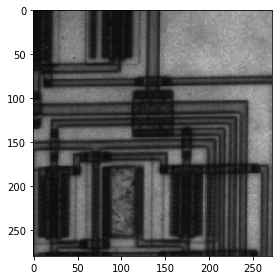

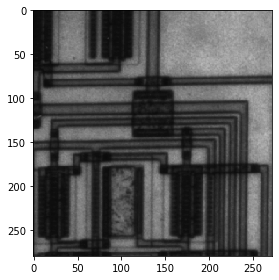

In [53]:
# printing the image
io.imshow(img)
io.show()
# make edge detection 
imgy = sk.filters.sobel(img)

# multiply by factor < 1
for i in range(imgy.shape[0]):
    for j in range(imgy.shape[1]):
        imgy[i][j] *= 0.2

# subtracting org - edge 
for i in range(imgy.shape[0]):
    for j in range(imgy.shape[1]):
        img[i][j] -= imgy[i][j] 

# printing the image
io.imshow(img, cmap = plt.cm.gray)
io.show()